# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공


## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용


## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능


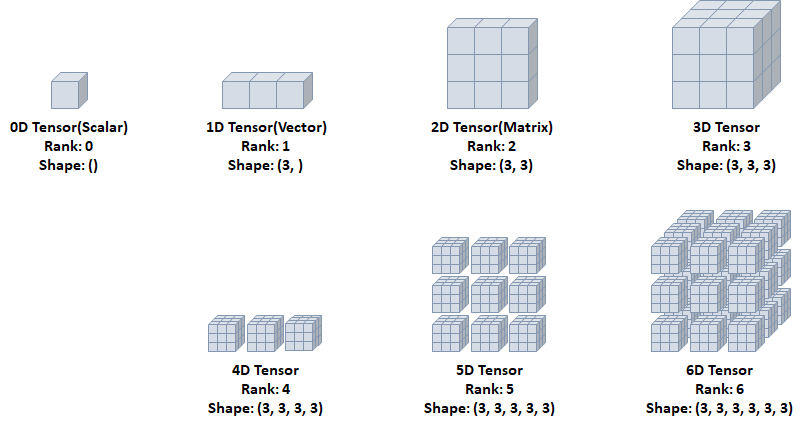

In [ ]:
import torch
torch.__version__

'1.10.0+cu111'

In [ ]:
# 텐서 초기화와 데이터 타입
x = torch.empty(4,2)
x

tensor([[8.0700e+20, 3.0934e-41],
        [3.3631e-44, 0.0000e+00],
        [       nan, 6.4460e-44],
        [1.1578e+27, 1.1362e+30]])

In [ ]:
# 무작위로 초기화된 텐서
x = torch.rand(4,2)
x

tensor([[0.6897, 0.6858],
        [0.7683, 0.7736],
        [0.7341, 0.1181],
        [0.8410, 0.1225]])

In [ ]:
# 데이터 타입이 long이고 0으로 채원진 텐서
x = torch.zeros(4,2,dtype=torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

In [ ]:
# 사용자가 입력한 값으로 텐서 초기화
x = torch.tensor([3,2,3])
x

tensor([3, 2, 3])

In [ ]:
torch.ones(2,4)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
# 2 x 4 크기, double 탕비, 1로 채워진 텐서
x = x.new_ones(2,4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [ ]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.8277, -0.4621,  1.6034,  0.0909],
        [ 0.4048, -0.0752, -0.9230,  1.4234]])


In [ ]:
# 텐서의 크기 계산
x.size()

torch.Size([2, 4])

In [ ]:
x.shape

torch.Size([2, 4])

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |


A signed integer is a 32-bit datum that encodes an integer in the range [-2147483648 to 2147483647]

unsigned int는 양수만 저장한다. 때문에 부호에 비트를 사용하지 않아 저장 가능한 양수의 범위를 두 배로 늘인다. signed int보다 더 넓은 범위의 양수(0~4,294,967,295)를 표현할 수 있지만 실제 표현 가능한 개수는 음수를 포함한 signed int와 동일하다.

In [ ]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [ ]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [ ]:
it = torch.IntTensor([1,2,3])
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


In [ ]:
# CUDA Tensors : .to 메소드를 사용하여 텐서를 어떻한 장치(cpu, gpu)로도 옮길 수 있다.
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.4806])
0.4805990755558014
torch.float32


In [ ]:
device = torch.device('cuda' if torch.cuda. is_available() else 'cpu')
print(device)

cuda


In [ ]:
y = torch.ones_like(x,device=device)
print(y)
x = x.to(device)
print(x)
z = x + y
print(z)
print(z.to('cpu', torch.double))

tensor([1.], device='cuda:0')
tensor([0.4806], device='cuda:0')
tensor([1.4806], device='cuda:0')
tensor([1.4806], dtype=torch.float64)


In [ ]:
# 다차원 텐서 표현

#0D Tensor(Scalar)
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


In [ ]:
# 1D Tensor
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


In [ ]:
# 2D Tensor
t2 = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


[과제] 3, 4, 5차원 텐서를 생성하여 출력하세요.

In [ ]:
# 텐서의 연산

import math
a = torch.randn(1,2) * 2 - 1
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5,0.5))

tensor([[0.6327, 1.7405]])
tensor([[0.6327, 1.7405]])
tensor([[1., 2.]])
tensor([[0., 1.]])
tensor([[0.5000, 0.5000]])


In [ ]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,1])))

tensor([[0.6327, 1.7405]])
tensor(0.6327)
tensor(1.7405)
tensor(1.1866)
tensor(0.7833)
tensor(1.1013)
tensor([1, 2, 3])


[과제] 2차원 텐서 x,y를 생성하여 덧셈(add), 뺄셈(sub), 곱셈(mul), 나눗셈(div), 내적(matmul, mm) 연산 사례를 pytorch로 1개 이상씩 수행하세요.

In [ ]:
# Manipulations
# 인덱싱: numpy처럼 인덱싱 형태로 사용 가능
import torch
x = torch.Tensor([[1,2],[3,4]])
print(x)

print(x[0,0])
print(x[:,0])
print(x[0,:])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor([1., 3.])
tensor([1., 2.])


In [ ]:
# view : 텐서의 크기(size)나 모양(shape)을 변경
x = torch.randn(4,5)
print(x.shape)
print(x.size())

torch.Size([4, 5])
torch.Size([4, 5])


In [ ]:
print(x,'\n')
y = x.view(20)
print(y)

tensor([[ 0.1118,  0.8994,  0.3411, -0.4483, -1.3506],
        [ 0.6243,  0.0780,  0.0753, -0.0728, -1.0387],
        [ 0.2569, -0.7024, -2.0687, -1.4128, -1.1679],
        [ 1.3951, -1.9475, -0.4342, -0.9477,  0.5107]]) 

tensor([ 0.1118,  0.8994,  0.3411, -0.4483, -1.3506,  0.6243,  0.0780,  0.0753,
        -0.0728, -1.0387,  0.2569, -0.7024, -2.0687, -1.4128, -1.1679,  1.3951,
        -1.9475, -0.4342, -0.9477,  0.5107])


In [ ]:
z = x.view(5,-1)
z

tensor([[ 0.1118,  0.8994,  0.3411, -0.4483],
        [-1.3506,  0.6243,  0.0780,  0.0753],
        [-0.0728, -1.0387,  0.2569, -0.7024],
        [-2.0687, -1.4128, -1.1679,  1.3951],
        [-1.9475, -0.4342, -0.9477,  0.5107]])

In [ ]:
# [과제]
x = torch.FloatTensor([
                       [1,2],
                       [3,4],
                       [5,6],
                       [7,8]
])
print(x)
# size를 활용한 텐서 사이즈 보기

# shape를 활용한 텐서 사이즈 보기

# dim을 활용한 텐서 차원 확인

# 0 차원 사이즈 확인

# 1 차원 사이즈 확인


tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [ ]:
import torch
x= torch.FloatTensor([
                      [1,2],
                      [3,4],
                      [5,6],
                      [7,8]])
print(x)
#size 를 활용한 텐서 사이즈 보기
print(x.size())
#  shape 를 활용한 텐서 사이즈 보기
print(x.shape)
# dim을 활용한 텐서 차원확인
print(x.dim())
#0차원 사이즈 확인
print(x.size(0))
#1차원 사이즈 확인
print(x.shape[1])


tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
torch.Size([4, 2])
torch.Size([4, 2])
2
4
2


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([1.4118])
1.4117828607559204
torch.float32


In [ ]:
# 스칼라값 하나만 존재해 item() 사용 가능
x = torch.randn(2)
print(x)
# print(x.item())
print(x.dtype)

tensor([ 0.5869, -0.4407])
torch.float32


In [ ]:
# squeeze : 차원을 축소
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.6424, 0.5512, 0.4478],
         [0.5819, 0.2396, 0.0352],
         [0.0822, 0.2548, 0.7746]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.6424, 0.5512, 0.4478],
        [0.5819, 0.2396, 0.0352],
        [0.0822, 0.2548, 0.7746]])
torch.Size([3, 3])


In [ ]:
# unsqueeze : 차원을 증가
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.1816, 0.7137, 0.1351],
        [0.9383, 0.4154, 0.4905],
        [0.5416, 0.0504, 0.8512]])
torch.Size([3, 3])


In [ ]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.1816, 0.7137, 0.1351],
         [0.9383, 0.4154, 0.4905],
         [0.5416, 0.0504, 0.8512]]])
torch.Size([1, 3, 3])


In [ ]:
tensor = t.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[0.1816],
         [0.7137],
         [0.1351]],

        [[0.9383],
         [0.4154],
         [0.4905]],

        [[0.5416],
         [0.0504],
         [0.8512]]])
torch.Size([3, 3, 1])


In [ ]:
# stack : 텐서간 결합
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)
print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


cat : 텐서를 결합하는 메소드(concatenate)
- stack과 유사하지만 쌓을 dim이 존재해야 함
- 해당 차원을 늘려준 후 결합

In [ ]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
c = torch.cat((a,b), dim=0)
print(c)
print(c.size())

tensor([[[ 0.2301,  0.3576,  1.5040],
         [-0.4216,  0.3157,  2.4319],
         [ 0.5282, -0.7924,  1.1214]]])
tensor([[[-1.1744,  0.5160, -2.4418],
         [-0.4941,  1.0492, -1.5464],
         [-0.7941, -0.4478,  0.6534]]])
tensor([[[ 0.2301,  0.3576,  1.5040],
         [-0.4216,  0.3157,  2.4319],
         [ 0.5282, -0.7924,  1.1214]],

        [[-1.1744,  0.5160, -2.4418],
         [-0.4941,  1.0492, -1.5464],
         [-0.7941, -0.4478,  0.6534]]])
torch.Size([2, 3, 3])


In [ ]:
c = torch.cat((a,b), dim=1)
print(c)
print(c.size())

tensor([[[ 0.2301,  0.3576,  1.5040],
         [-0.4216,  0.3157,  2.4319],
         [ 0.5282, -0.7924,  1.1214],
         [-1.1744,  0.5160, -2.4418],
         [-0.4941,  1.0492, -1.5464],
         [-0.7941, -0.4478,  0.6534]]])
torch.Size([1, 6, 3])


In [ ]:
c = torch.cat((a,b), dim=2)
print(c)
print(c.size())

tensor([[[ 0.2301,  0.3576,  1.5040, -1.1744,  0.5160, -2.4418],
         [-0.4216,  0.3157,  2.4319, -0.4941,  1.0492, -1.5464],
         [ 0.5282, -0.7924,  1.1214, -0.7941, -0.4478,  0.6534]]])
torch.Size([1, 3, 6])


In [ ]:
# chunk : 텐서를 여러 개로 나눌 때 사용(몇 개로 나눌 것인가?)
tensor = torch.rand(3,6)
print(tensor)

t1,t2,t3 = torch.chunk(tensor, 3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.7279, 0.2439, 0.0831, 0.8895, 0.1036, 0.3377],
        [0.2661, 0.9169, 0.5067, 0.4375, 0.9329, 0.4588],
        [0.4893, 0.6699, 0.4107, 0.6928, 0.8288, 0.4861]])
tensor([[0.7279, 0.2439],
        [0.2661, 0.9169],
        [0.4893, 0.6699]])
tensor([[0.0831, 0.8895],
        [0.5067, 0.4375],
        [0.4107, 0.6928]])
tensor([[0.1036, 0.3377],
        [0.9329, 0.4588],
        [0.8288, 0.4861]])


In [ ]:
# split : chunk와 동일한 기능이지만 조금 다름(텐서의 크기는 몇인가?)
tensor = torch.rand(3,6)
print(tensor)

t1,t2,t3 = torch.split(tensor, 2, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.0726, 0.2374, 0.6058, 0.4803, 0.4911, 0.5583],
        [0.9106, 0.8651, 0.9333, 0.5248, 0.3324, 0.9301],
        [0.9888, 0.7644, 0.4450, 0.9834, 0.6806, 0.3095]])
tensor([[0.0726, 0.2374],
        [0.9106, 0.8651],
        [0.9888, 0.7644]])
tensor([[0.6058, 0.4803],
        [0.9333, 0.5248],
        [0.4450, 0.9834]])
tensor([[0.4911, 0.5583],
        [0.3324, 0.9301],
        [0.6806, 0.3095]])


torch ↔️ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [ ]:
from torch.cuda import is_available
device = torch.device('cuda' if torch.cuda. is_available() else 'cpu')
print(device)


cuda


In [ ]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
print(a.to('cpu', torch.double))
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [ ]:
import numpy as np
a = np.ones(7)
b = torch.from_numpy(a)
np.add(a,1,out=a) 
print(a)
print(b) # cpu에서 메모리 공유


[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html



- requires_grad 속성을 True로 설정하면 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작. 
- 기록을 추적하는 것을 중단하게 하려면 .detach()를 호출하여 연산기록으로 부터 분리
- grad_fn : 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해서 backprop 했는지)

requires_grad_(...)는 기존 텐성의 requires_grad 값을 바꿔치기(in-place)하여 변경

In [ ]:
# in-place 방식으로 텐서의 값을 변경하는 연산 뒤에는 _가 붙음
x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)
y.add_(x)
print(y)

tensor([[0.9636, 0.8357],
        [0.6830, 0.9029]])
tensor([[0.1787, 0.4257],
        [0.7781, 0.8655]])
tensor([[1.1423, 1.2614],
        [1.4611, 1.7684]])


In [ ]:
a = torch.randn(3,3)
a = a * 3
print(a)
print(a.requires_grad)

tensor([[-2.1120, -0.2767, -5.9326],
        [-0.4215,  2.1590,  0.8315],
        [ 0.0253, -3.7931,  1.8881]])
False


In [ ]:
a.requires_grad_(True) # _를 사용하면 inplace 연산. 
print(a.requires_grad)
b = (a * a).sum()
print(b)
print(b.grad_fn)

True
tensor(63.2174, grad_fn=<SumBackward0>)


In [ ]:
# 기울기(Gradient)
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
z = y * y
out = z.mean()
print(z,out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


In [ ]:
print(out)
out.backward() # backward를 통해서 역전파 계산이 가능

tensor(36., grad_fn=<MeanBackward0>)


In [ ]:
# grad : data가 거쳐온 layer에 대한 미분값 저장
print(x)
print(x.grad) # 미분값

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용


In [ ]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


In [ ]:
# detach()
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)

True
False


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [ ]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


In [ ]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [ ]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [ ]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


# 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음


토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [1]:
from torch.utils.data import Dataset, DataLoader

In [2]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요


In [3]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=(0.5,), std=(1.0,))])


In [4]:
trainset = datasets.MNIST(root = '/content',
                          train=True, download=True,
                          transform=mnist_transform)
testset = datasets.MNIST(root='/content/',
                         train=False, download=True,
                         transform=mnist_transform)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [5]:
!ls ./MNIST/raw

t10k-images-idx3-ubyte	   train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte	   train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [6]:
# DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기 만큼 데이터를 가져옴
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

In [7]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [ ]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

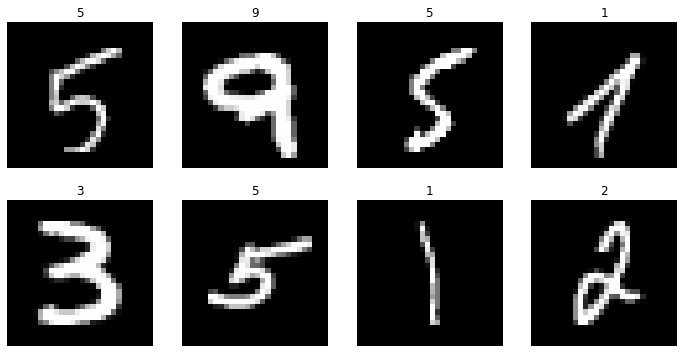

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4,2
for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(trainset), size=(1,)).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap='gray')
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [10]:
import torch
import torch.nn as nn

In [11]:
input = torch.randn(128,20)
print(input)

m = nn.Linear(20,30)
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[ 0.3898,  1.3061, -2.1815,  ...,  0.5001,  0.2720,  0.3801],
        [ 1.1455, -1.5436,  0.0700,  ..., -0.9553, -0.2874, -0.7055],
        [-1.3658, -2.1355,  0.0345,  ...,  0.1187,  0.3548,  0.1424],
        ...,
        [-1.5777,  2.9445,  0.1434,  ...,  0.6486,  0.8139, -0.3662],
        [ 0.3976, -0.0941,  0.7344,  ..., -0.0320,  0.0783,  0.1630],
        [-0.4427,  0.5576, -0.7904,  ...,  1.2360, -0.8988,  0.9319]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[-0.2413,  0.7358,  0.7290,  ...,  0.0897, -0.1038,  0.0638],
        [-0.5023, -0.1360,  0.6874,  ...,  0.4701,  0.0292, -0.5603],
        [-0.4309, -0.1852, -0.6917,  ..., -1.1630,  0.3314,  0.5611],
        ...,
        [-0.6120,  0.7775, -0.1740,  ..., -0.3841, -0.1544,  0.6158],
        [ 1.1759,  0.4719,  1.2513,  ..., -1.0349,  0.0063, -0.8577],
        [-0.3118,  0.1618, -0.0273,  ...,  0.0821,  0.1569,  0.7918]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


In [12]:
input = torch.randn(20,16,50,100)
print(input.size())

torch.Size([20, 16, 50, 100])


dilation:

https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1


In [13]:
# dilation은 한 픽셀에서 다른 픽셀 까지의 거리
m = nn.Conv2d(16,33,3,stride=2)
m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2))
m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2),dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [14]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈


In [15]:
nn.Conv2d(in_channels=1, out_channels=20,kernel_size=5,stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [16]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [17]:
# weight 확인
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [18]:
# weight는 detach()를 통해 꺼내주어야 numpy() 변환 가능
weight = weight.detach()
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

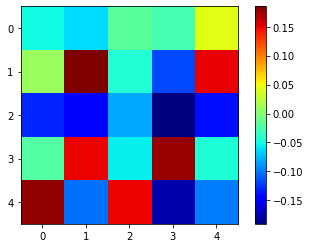

In [19]:
import matplotlib.pyplot as plt
plt.imshow(weight[0,0,:,:],'jet')
plt.colorbar()
plt.show()

In [20]:
# mnist image
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [21]:
input_data = torch.unsqueeze(images[0],dim=0)
print(input_data.size())

torch.Size([1, 1, 28, 28])


In [22]:
output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

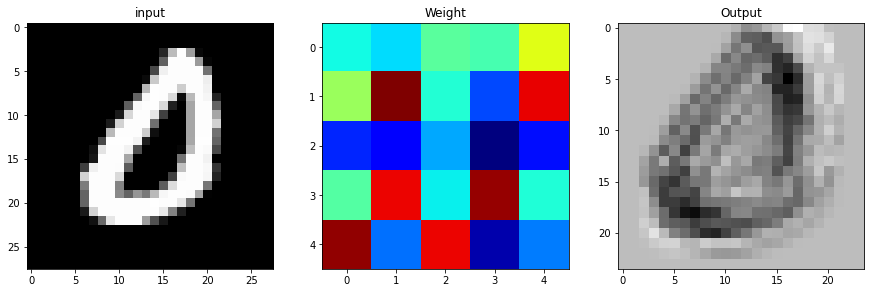

In [23]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title('input')
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:],'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0,0,:,:], 'gray')
plt.show()

### 풀링 레이어(Pooling layers)

- `F.max_pool2d` 
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용


In [24]:
import torch.nn.functional as F 
pool = F.max_pool2d(output,2,2)
pool.shape

torch.Size([1, 20, 12, 12])

In [25]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

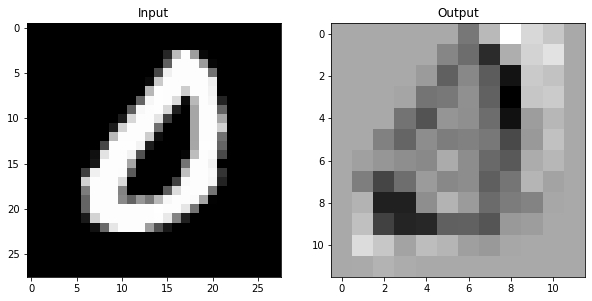

In [26]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title('Input')
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:],'gray')

In [27]:
# 선형 레이어(Linear layer) : 1d만 가능하므로 .view()를 통해 1d로 펼쳐주어야 함
flatten = input_image.view(1,28 * 28)
flatten.shape


torch.Size([1, 784])

In [28]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [29]:
lin

tensor([[ 0.4857,  0.0207, -0.5425, -0.1690,  0.1073, -0.0854, -0.0926, -0.1343,
         -0.0970, -0.0938]], grad_fn=<AddmmBackward0>)

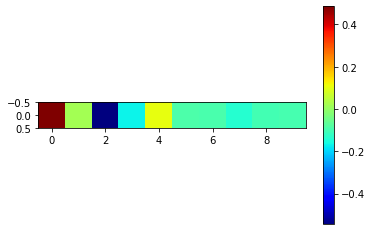

In [30]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

In [31]:
# 비선형 활성화(Non-linear Activation)
with torch.no_grad():
  flatten = input_image.view(1,28 * 28)
  lin = nn.Linear(784,10)(flatten)
  softmax = F.softmax(lin,dim=1)

softmax

tensor([[0.0703, 0.1169, 0.1232, 0.1110, 0.0777, 0.1404, 0.1081, 0.1010, 0.0734,
         0.0779]])

In [32]:
import numpy as np
np.sum(softmax.numpy())

1.0000001

선형 회귀 모델

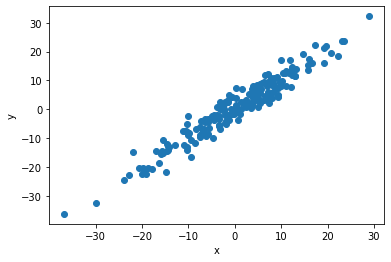

In [33]:
# 데이터 생성
X = torch.randn(200,1) * 10
y = X + 3 * torch.randn(200,1)
plt.scatter(X.numpy(),y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [34]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1,1)

  def forward(self,x):
    pred = self.linear(x)
    return pred


In [35]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))


LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.0104]], requires_grad=True), Parameter containing:
tensor([-0.3016], requires_grad=True)]


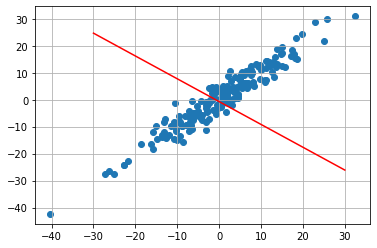

In [ ]:
import numpy as np
w, b = model.parameters()
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.plot(x1,y1,'r')
plt.scatter(X,y)
plt.grid()
plt.show()

In [ ]:
# 손실 함수 및 옵티마이저
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
# 모델 학습
epochs = 100
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()

  y_pred = model(X)
  loss = criterion(y_pred, y)
  losses.append(loss.item())
  loss.backward()  # 역전파 수행, 자동 미분 결과 업데이트

  optimizer.step() # 옵티마이저 스탭을 다음으로 진행

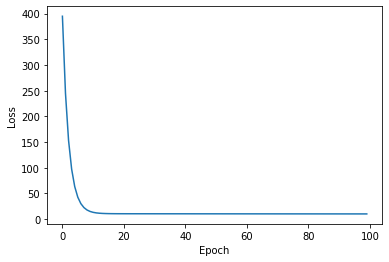

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

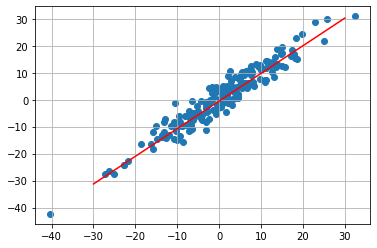

In [ ]:
import numpy as np
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.plot(x1,y1,'r')
plt.scatter(X,y)
plt.grid()
plt.show()

FashionMNIST 분류 모델

In [ ]:
# 데이터 로드
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets 
import torchvision.transforms as transforms 

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5))])

In [ ]:
trainset = datasets.FashionMNIST(root = '/content/',
                                 train=True, download=True,
                                 transform=transform)
testset = datasets.FashionMNIST(root = '/content/',
                                 train=False, download=True,
                                 transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [ ]:
train_loader = DataLoader(trainset, batch_size=128, num_workers=2)
test_loader = DataLoader(testset, batch_size=128, num_workers=2)

In [ ]:
# iter는 반복 가능한 객체에서 이터레이터를 반환하고 next는 이터레이터에서 값을 차례대로 꺼냄
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

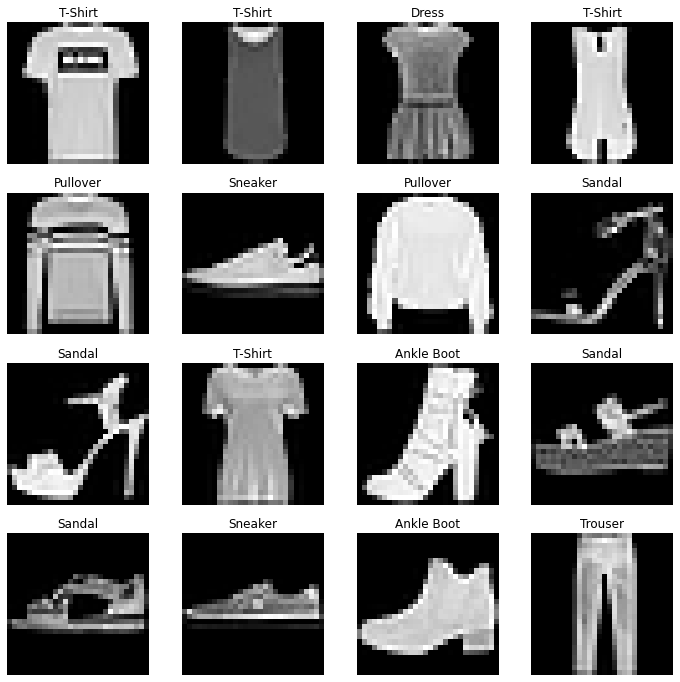

In [ ]:
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot',
}
figure = plt.figure(figsize=(12,12))
cols, rows = 4,4
for i in range(1,cols*rows+1):
  image = images[i].squeeze()
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows,cols,i)
  plt.title(label) 
  plt.axis('off')
  plt.imshow(image,cmap='gray')
plt.show()

In [ ]:
from re import S
# 모델 정의 및 파라미터
import torch.nn.functional as F

class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()

    self.conv1 = nn.Conv2d(1,6,3)
    self.conv2 = nn.Conv2d(6,16,3)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)),2)
    x = x.view(-1,self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self,x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s 

    return num_features
net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [ ]:
input = torch.randn(1,1,28,28)
out = net(input)
print(out)

tensor([[-0.1512,  0.0814,  0.0933,  0.0485,  0.1649,  0.1178,  0.0143, -0.0411,
         -0.0397,  0.0915]], grad_fn=<AddmmBackward0>)


In [ ]:
# 손실 함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# 모델 학습
total_batch = len(train_loader)
print(total_batch)

469


zero_grad()

보통 딥러닝에서는 미니배치+루프 조합을 사용해서 parameter들을 업데이트하는데,
한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 .grad 값에 변화도가 저장이 된다.

이후 다음 루프에서 zero_grad()를 하지않고 역전파를 시키면 이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에도 간섭을 해서 원하는 방향으로 학습이 안된다고 한다.

따라서 루프가 한번 돌고나서 역전파를 하기전에 반드시 zero_grad()로 .grad 값들을 0으로 초기화시킨 후 학습을 진행해야 한다.


In [ ]:
for epoch in range(10):
  running_loss = 0.0 # 초기화

  for i, data in enumerate(train_loader,0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 100 == 99:
      print('Epoch:{}, Iter:{}, Loss:{}'.format(epoch+1, i+1, running_loss/20000))
      running_loss = 0.0

Epoch:1, Iter:100, Loss:0.011500998389720917
Epoch:1, Iter:200, Loss:0.011465573596954345
Epoch:1, Iter:300, Loss:0.011402497839927674
Epoch:1, Iter:400, Loss:0.011272733676433564
Epoch:2, Iter:100, Loss:0.01022226750254631
Epoch:2, Iter:200, Loss:0.007870581066608429
Epoch:2, Iter:300, Loss:0.005293631312251091
Epoch:2, Iter:400, Loss:0.0042202147632837295
Epoch:3, Iter:100, Loss:0.0037406673341989515
Epoch:3, Iter:200, Loss:0.0036597302824258804
Epoch:3, Iter:300, Loss:0.0035522170692682264
Epoch:3, Iter:400, Loss:0.003396055254340172
Epoch:4, Iter:100, Loss:0.00329805805683136
Epoch:4, Iter:200, Loss:0.00332514892667532
Epoch:4, Iter:300, Loss:0.0032639291897416114
Epoch:4, Iter:400, Loss:0.003136445477604866
Epoch:5, Iter:100, Loss:0.0030853878989815712
Epoch:5, Iter:200, Loss:0.00313724917024374
Epoch:5, Iter:300, Loss:0.003073608084022999
Epoch:5, Iter:400, Loss:0.0029599099099636077
Epoch:6, Iter:100, Loss:0.0029278409525752068
Epoch:6, Iter:200, Loss:0.002981056959927082
Epoch:

### 모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드


In [ ]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [ ]:
# 모델 테스트

def imshow(image):
  image = image / 2 + 0.5
  npimg = image.numpy()

  fit = plt.figure(figsize=(16,8))
  plt.imshow(np.transpose(npimg,(1,2,0)))  # rgb -> gbr
  plt.show()

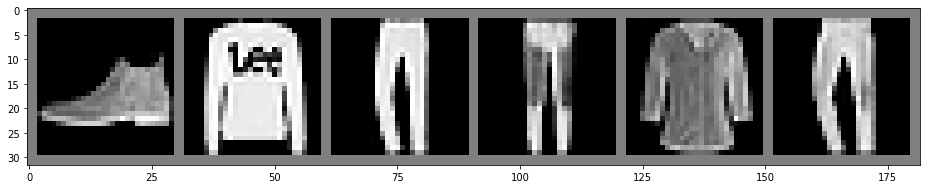

In [ ]:
import torchvision

dataiter = iter(test_loader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images[:6]))

In [ ]:
outputs = net(images)
_,predicted = torch.max(outputs,1)
print(predicted)

tensor([7, 2, 1, 1, 6, 1, 4, 6, 7, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5,
        1, 2, 4, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 7, 7, 9, 0, 1, 3, 9, 4, 7, 2, 1,
        2, 2, 2, 2, 5, 8, 4, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 0, 4, 7, 8, 7, 0,
        2, 0, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 4, 7, 1, 8,
        0, 1, 4, 2, 3, 4, 7, 6, 7, 8, 7, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4])


In [ ]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Sneaker, Pullover, Trouser, Trouser, Shirt, Trouser, 


In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(100 * correct / total)

79.37
